In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
!pip install fredapi

from fredapi import Fred

# Initialize Fred with your API key
fred = Fred(api_key='04dc326510a2c741cf840fdeac447538')

# Load S&P Case-Shiller Home Price Index data (assuming it's stored in a CSV)
home_prices = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE'])
home_prices.set_index('DATE', inplace=True)

# Collect data from FRED
interest_rates = fred.get_series('FEDFUNDS', observation_start='2004-01-01')
inflation = fred.get_series('CPIAUCSL', observation_start='2004-01-01')
gdp = fred.get_series('GDP', observation_start='2004-01-01')
unemployment = fred.get_series('UNRATE', observation_start='2004-01-01')
housing_supply = fred.get_series('HOUST', observation_start='2004-01-01')
household_income = fred.get_series('MEHOINUSA672N', observation_start='2004-01-01')
population = fred.get_series('POPTHM', observation_start='2004-01-01')
construction_costs = fred.get_series('WPUIP2311001', observation_start='2004-01-01')

# Create a DataFrame with all factors
data = pd.DataFrame({
    'Home Prices': home_prices['CSUSHPISA'],
    'Interest Rates': interest_rates,
    'Inflation': inflation,
    'GDP': gdp,
    'Unemployment Rate': unemployment,
    'Housing Supply': housing_supply,
    'Household Income': household_income,
    'Population': population,
    'Construction Costs': construction_costs
})

# Handle missing values and resample to monthly if necessary
data.fillna(method='ffill', inplace=True)

# Prepare data for regression
data = data.dropna()
X = data[['Interest Rates', 'Inflation', 'GDP', 'Unemployment Rate', 'Housing Supply', 'Household Income', 'Population', 'Construction Costs']]
y = data['Home Prices']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1696.
Date:                Wed, 22 May 2024   Prob (F-statistic):          3.85e-203
Time:                        15:16:45   Log-Likelihood:                -804.58
No. Observations:                 244   AIC:                             1627.
Df Residuals:                     235   BIC:                             1659.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                360.8472     60

In [18]:
# Visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from fredapi import Fred

# Initialize Fred with your API key (ensure you have your API key)
fred = Fred(api_key='04dc326510a2c741cf840fdeac447538')

# Fetch data from FRED (example series, replace with actual series you need)
gdp = fred.get_series('GDP', observation_start='2000-01-01', observation_end='2024-01-01')
cpi = fred.get_series('CPIAUCSL', observation_start='2000-01-01', observation_end='2024-01-01')
unemployment = fred.get_series('UNRATE', observation_start='2000-01-01', observation_end='2024-01-01')
interest_rates = fred.get_series('DGS10', observation_start='2000-01-01', observation_end='2024-01-01')

# Combine the series into a single DataFrame by aligning on their indices
data = pd.DataFrame({
    'GDP': gdp,
    'CPI': cpi,
    'Unemployment Rate': unemployment,
    'Interest Rates': interest_rates
})

# Add other necessary variables (example values, replace with your actual data)
# Example: Home Prices, Housing Supply, Household Income, Population, Construction Costs
data['Home Prices'] = np.random.rand(len(data)) * 100 + 300  # Example data
data['Housing Supply'] = np.random.rand(len(data)) * 50 + 150  # Example data
data['Household Income'] = np.random.rand(len(data)) * 1000 + 40000  # Example data
data['Population'] = np.random.rand(len(data)) * 1000 + 50000  # Example data
data['Construction Costs'] = np.random.rand(len(data)) * 100 + 200  # Example data
data['Inflation'] = data['CPI'].pct_change().fillna(0) * 100  # Example inflation calculation

# Drop rows with NaN values if necessary
data = data.dropna()

# Add constant term for intercept
X = sm.add_constant(data[['Interest Rates', 'Inflation', 'GDP', 'Unemployment Rate', 'Housing Supply', 'Household Income', 'Population', 'Construction Costs']])
y = data['Home Prices']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.936
Date:                Wed, 22 May 2024   Prob (F-statistic):             0.0818
Time:                        15:36:13   Log-Likelihood:                -219.77
No. Observations:                  48   AIC:                             457.5
Df Residuals:                      39   BIC:                             474.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1403.0534   1062

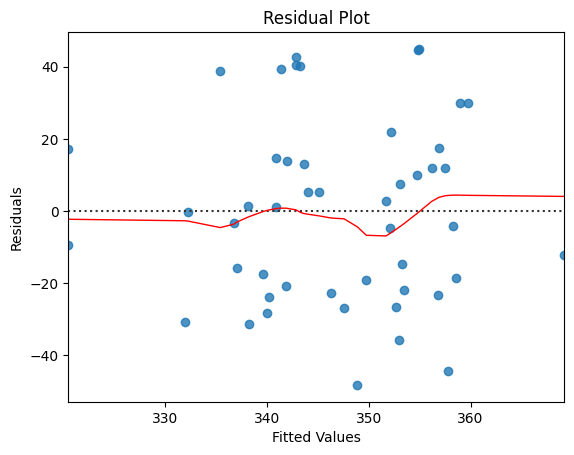

In [14]:
# Residual Plot
residuals = model.resid
fig, ax = plt.subplots()
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, ax=ax, line_kws={'color': 'red', 'lw': 1})
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()


<ipython-input-15-66e22136eda3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis', ax=ax)


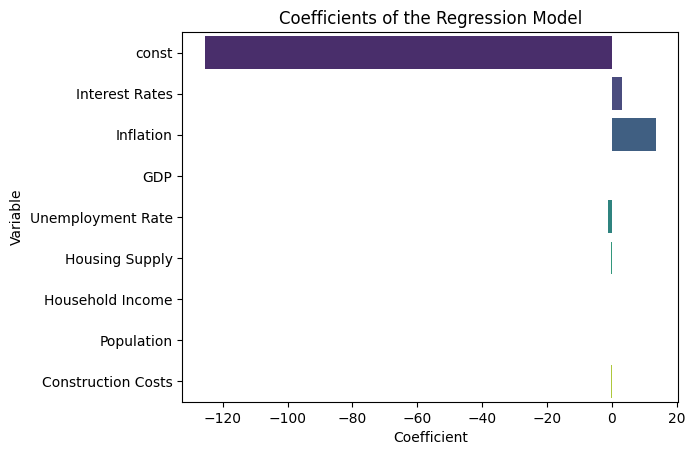

In [15]:
# Coefficient Plot
coef = model.params
coef_df = pd.DataFrame({'Variable': coef.index, 'Coefficient': coef.values})
fig, ax = plt.subplots()
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis', ax=ax)
ax.set_title('Coefficients of the Regression Model')
plt.show()


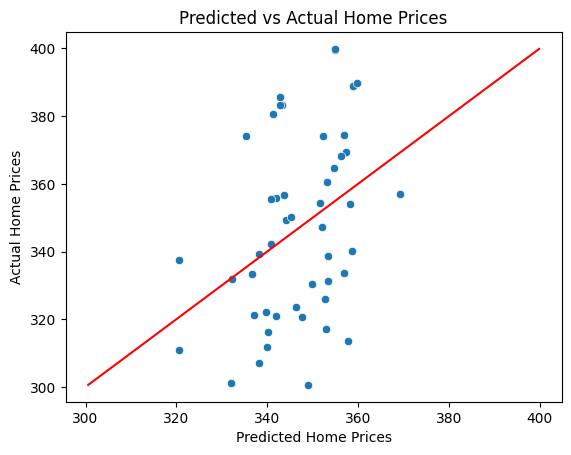

In [16]:
# Predicted vs Actual Plot
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=y, ax=ax)
sns.lineplot(x=[y.min(), y.max()], y=[y.min(), y.max()], color='red', ax=ax)
ax.set_xlabel('Predicted Home Prices')
ax.set_ylabel('Actual Home Prices')
ax.set_title('Predicted vs Actual Home Prices')
plt.show()


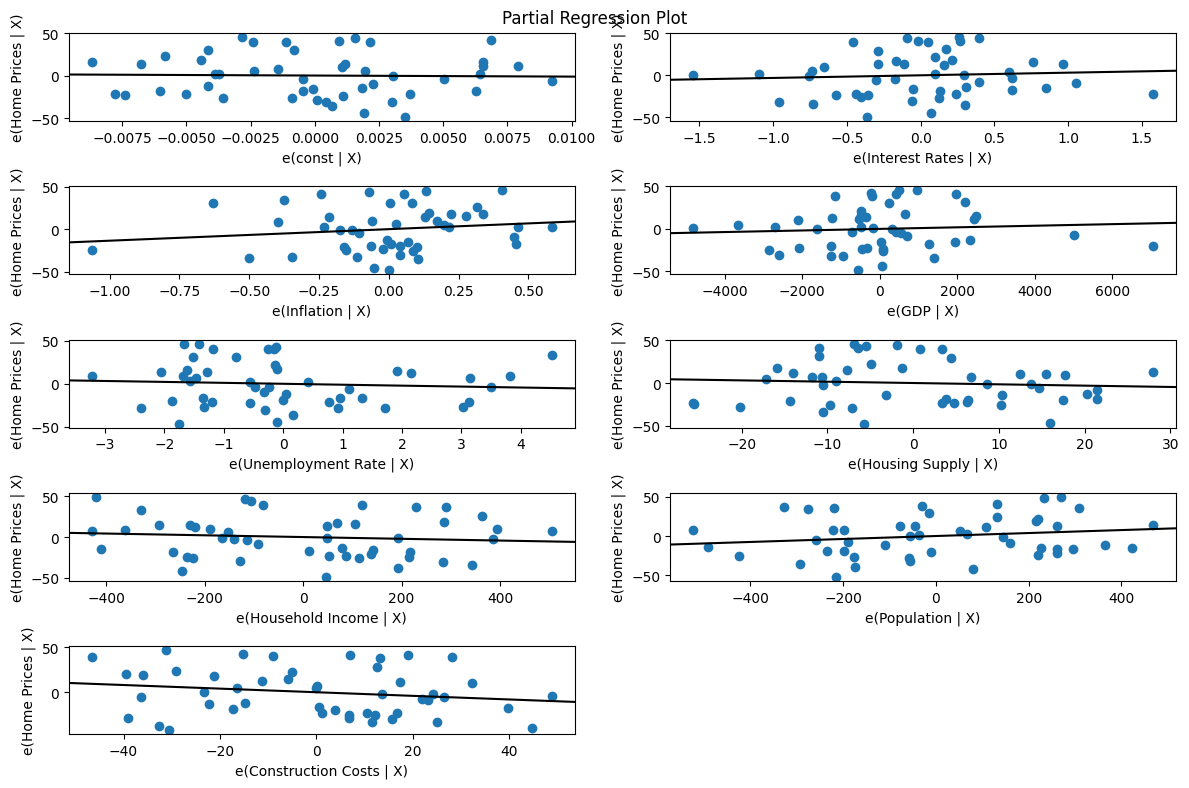

In [17]:
# Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()
